In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [298]:
# Importing the data dictionary
pd.set_option('display.max_colwidth',None)
df_dict=pd.read_excel("/content/drive/MyDrive/Python Basics and Assignments/3. Machine Learning/Data Dictionary - Creating cohorts of songs.xlsx")
df_dict

Variable  \
0               name   
1              album   
2       release_date   
3       track number   
4                 id   
5                uri   
6       acousticness   
7       danceability   
8             energy   
9   instrumentalness   
10          liveness   
11          loudness   
12       speechiness   
13             tempo   
14           valence   
15        popularity   
16       duration_ms   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Description  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     the name of the song  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    the name of the album  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                            the day month and year the album was released  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                  the order the song appears on the album  
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                              the Spotify id for the song  
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                             the Spotify uri for the song  
6                                                                                                                               

In [299]:
# Importing the csv data into dataframe df
df=pd.read_csv("/content/drive/MyDrive/Python Basics and Assignments/3. Machine Learning/rolling_stones_spotify.csv")
df.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [300]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [301]:
df.shape

(1610, 18)

In [302]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

## 1. Initial data inspection and data cleaning:
### a.Examine the data initially to identify duplicates missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed

In [303]:
# Dropping the column Unnamed 0
df=df.drop('Unnamed: 0',axis=1)

In [304]:
df.describe()

track_number  acousticness  danceability       energy  \
count   1610.000000   1610.000000   1610.000000  1610.000000   
mean       8.613665      0.250475      0.468860     0.792352   
std        6.560220      0.227397      0.141775     0.179886   
min        1.000000      0.000009      0.104000     0.141000   
25%        4.000000      0.058350      0.362250     0.674000   
50%        7.000000      0.183000      0.458000     0.848500   
75%       11.000000      0.403750      0.578000     0.945000   
max       47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

In [305]:
df = df.drop_duplicates() # checking and dropping duplicates
df = df.dropna() # checking and dropping rows where value is na
print(df.shape)
df.describe()

(1610, 17)


track_number  acousticness  danceability       energy  \
count   1610.000000   1610.000000   1610.000000  1610.000000   
mean       8.613665      0.250475      0.468860     0.792352   
std        6.560220      0.227397      0.141775     0.179886   
min        1.000000      0.000009      0.104000     0.141000   
25%        4.000000      0.058350      0.362250     0.674000   
50%        7.000000      0.183000      0.458000     0.848500   
75%       11.000000      0.403750      0.578000     0.945000   
max       47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

In [306]:
pd.set_option('display.max_rows',None)
df.isna().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [308]:
cols = df.select_dtypes(include=['number']).columns
cols
for col in cols:

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(outliers.count())

name                76
album               76
release_date        76
track_number        76
id                  76
uri                 76
acousticness        76
danceability        76
energy              76
instrumentalness    76
liveness            76
loudness            76
speechiness         76
tempo               76
valence             76
popularity          76
duration_ms         76
dtype: int64


In [309]:
# We want to drop the outliers from df dataframe because based on the data, we cannot go for outlier handling.

df = df.drop(outliers.index)
df.shape

(1534, 17)

# 2. Refine the data for further processing based on your findings

In [310]:
df.describe()

track_number  acousticness  danceability       energy  \
count   1534.000000   1534.000000   1534.000000  1534.000000   
mean       8.504563      0.249102      0.472453     0.790412   
std        6.582978      0.226854      0.142556     0.180344   
min        1.000000      0.000009      0.104000     0.242000   
25%        4.000000      0.056075      0.366000     0.671000   
50%        7.000000      0.180500      0.462500     0.843000   
75%       11.000000      0.402500      0.583000     0.945000   
max       47.000000      0.939000      0.887000     0.999000   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       1534.000000  1534.000000  1534.000000  1534.000000  1534.000000   
mean           0.162333     0.477406    -6.938440     0.068262   125.967190   
std            0.275220     0.346043     2.896679     0.051337    29.517091   
min            0.000000     0.021900   -21.548000     0.023200    46.525000   
25%            0.000180     0.147250    -9.003000     0.036125   106.863000   
50%            0.013150     0.356000    -6.557000     0.050000   124.124500   
75%            0.176750     0.875500    -4.599000     0.083825   142.333500   
max            0.996000     0.998000    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1534.000000  1534.000000    1534.000000  
mean      0.588869    20.958279  243061.243155  
std       0.231221    12.562416   75449.617771  
min       0.015900     0.000000   35920.000000  
25%       0.412000    13.000000  189096.000000  
50%       0.593000    20.000000  238779.500000  
75%       0.783000    27.000000  288756.000000  
max       0.974000    80.000000  451960.000000

In [311]:
# Change release_date to pd.datetime

df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1534 non-null   object        
 1   album             1534 non-null   object        
 2   release_date      1534 non-null   datetime64[ns]
 3   track_number      1534 non-null   int64         
 4   id                1534 non-null   object        
 5   uri               1534 non-null   object        
 6   acousticness      1534 non-null   float64       
 7   danceability      1534 non-null   float64       
 8   energy            1534 non-null   float64       
 9   instrumentalness  1534 non-null   float64       
 10  liveness          1534 non-null   float64       
 11  loudness          1534 non-null   float64       
 12  speechiness       1534 non-null   float64       
 13  tempo             1534 non-null   float64       
 14  valence           1534 non-nu

In [312]:
# We can drop uri column as well because uri is nothing but combination of id pre-pended by spotify:track:. We can re-construct this column if required.
df = df.drop('uri', axis=1)

In [313]:
df.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4            Don’t Stop - Live  Licked Live In NYC   2022-06-10             5   

                       id  acousticness  danceability  energy  \
0  2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   0.993   
1  6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   0.965   
2  1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   0.969   
3  1agTQzOTUnGNggyckEqiDH        0.5670         0.369   0.985   
4  7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   0.969   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0          0.996000     0.932   -12.913       0.1100  118.001   0.0302   
1          0.233000     0.961    -4.803       0.0759  131.455   0.3180   
2          0.400000     0.956    -4.936       0.1150  130.066   0.3130   
3          0.000107     0.895    -5.535       0.1930  132.994   0.1470   
4          0.055900     0.966    -5.098       0.0930  130.533   0.2060   

   popularity  duration_ms  
0          33        48640  
1          34       253173  
2          34       263160  
3          32       305880  
4          32       305106

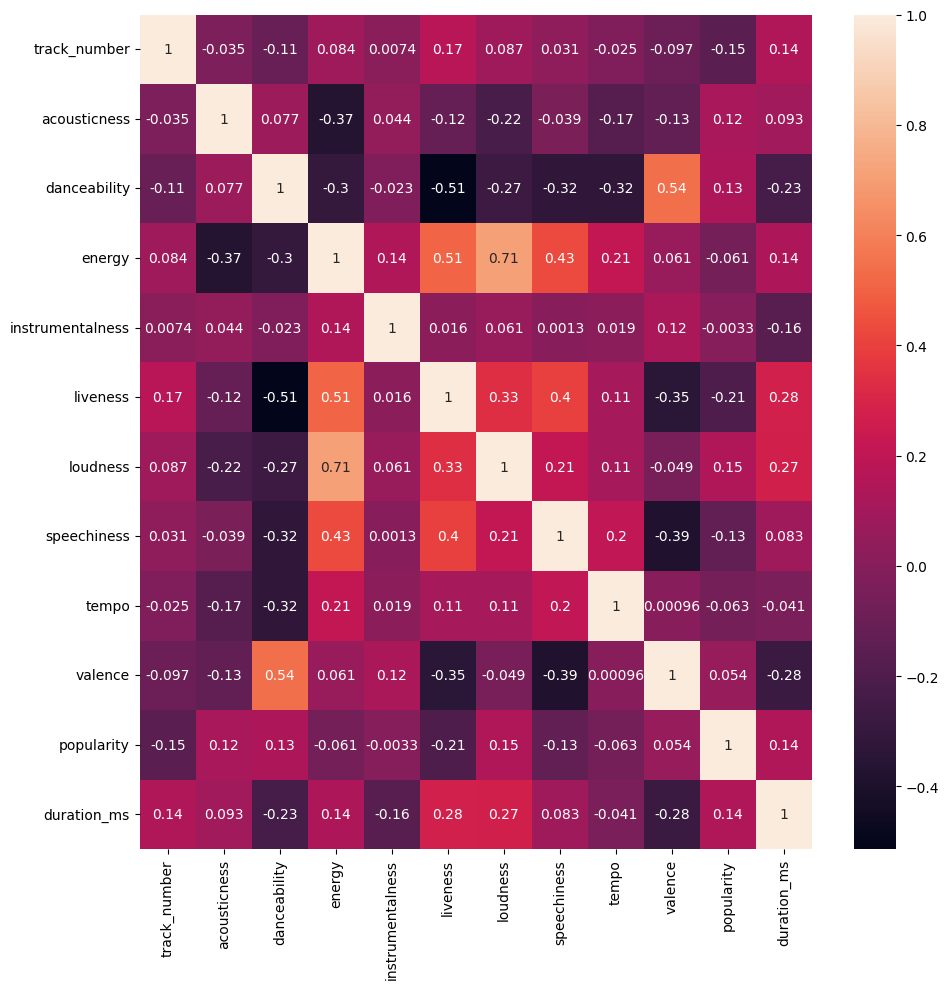

In [314]:
df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.tight_layout()
plt.show()


### 1. Loudness seems to be highly co-related with the energy.
### 2. There is some co-relation between danceability and valence.
### 3. There is some co-relation between energy and liveness.
### 4. There is low co-relation between speechiness and energy.
### 5. There is low co-relation between liveness and loudness.

## 3. Perform exploratory data analysis and feature engineering
### a. Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

In [315]:
# Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

df.head()
df.groupby('album').count()

name  \
album                                                                                   
12 X 5                                                                             12   
12 x 5                                                                             12   
A Bigger Bang (2009 Re-Mastered)                                                   16   
A Bigger Bang (Live)                                                               19   
Aftermath                                                                          10   
Aftermath (UK Version)                                                             26   
Beggars Banquet                                                                    10   
Beggars Banquet (50th Anniversary Edition)                                         10   
Between The Buttons                                                                24   
Between The Buttons (UK Version)                                                   12   
Between The Buttons (US track listing)                                             12   
Black And Blue                                                                      8   
Black And Blue (Remastered 2009)                                                    8   
Blue & Lonesome                                                                    12   
Bridges To Babylon                                                                 13   
Bridges To Babylon (Remastered)                                                    13   
Bridges To Bremen (Live)                                                           19   
Bridges To Buenos Aires (Live)                                                     20   
December's Children (and everybody's)                                              12   
December’s Children (And Everybody’s)                                              12   
Dirty Work                                                                         10   
Dirty Work (Remastered 2009)                                                       10   
Emotional Rescue                                                                   10   
Emotional Rescue (2009 Re-Mastered)                                                10   
England's Newest Hit Makers                                                        12   
England’s Newest Hitmakers                                                         12   
Exile On Main Street (2010 Re-Mastered)                                            18   
Exile On Main Street (Bonus Track Version)                                         29   
Exile On Main Street (Deluxe Version)                                              28   
Flashpoint                                                                         32   
Flowers                                                                            24   
From The Vault: No Security - San Jose 1999 (Live)                                 16   
Get Yer Ya Yas Out                                                                  9   
Get Yer Ya-Ya's Out! (Remastered)                                                   9   
Get Yer Ya-Ya's Out! The Rolling Stones In Concert (40th Anniversary Edition)      26   
Goats Head Soup                                                                    10   
Goats Head Soup (Deluxe)                                                           35   
Goats Head Soup (Remastered 2009)                                                  10   
Got Live if you want it!                                                           12   
Havana Moon (Live)                                                                 12   
Honk (Deluxe)                                                                      47   
It's Only Rock 'N' Roll                                                            10   
It's Only Rock 'N' Roll (2009 Re-Mastered)                                         10   
Jamming With Edward                                                         

In [316]:
df.shape

(1534, 16)

In [317]:
df['album_normalized'] = df['album'].str.lower().str.strip()
df.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4            Don’t Stop - Live  Licked Live In NYC   2022-06-10             5   

                       id  acousticness  danceability  energy  \
0  2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   0.993   
1  6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   0.965   
2  1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   0.969   
3  1agTQzOTUnGNggyckEqiDH        0.5670         0.369   0.985   
4  7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   0.969   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0          0.996000     0.932   -12.913       0.1100  118.001   0.0302   
1          0.233000     0.961    -4.803       0.0759  131.455   0.3180   
2          0.400000     0.956    -4.936       0.1150  130.066   0.3130   
3          0.000107     0.895    -5.535       0.1930  132.994   0.1470   
4          0.055900     0.966    -5.098       0.0930  130.533   0.2060   

   popularity  duration_ms    album_normalized  
0          33        48640  licked live in nyc  
1          34       253173  licked live in nyc  
2          34       263160  licked live in nyc  
3          32       305880  licked live in nyc  
4          32       305106  licked live in nyc

In [318]:
df = df.drop_duplicates(subset=['album_normalized','name'], keep='first')

In [319]:
df = df.drop('album_normalized', axis = 1)

In [320]:
df.shape

(1417, 16)

In [321]:
# Selecting top 3 albums based on the maximum popular songs in that particular album.
album_popularity = df.groupby('album').agg(popularity=('popularity','mean')).sort_values(by='popularity', ascending=False).reset_index().head(3)
album_popularity['popularity'] = album_popularity['popularity'].round(2)
album_popularity

album  popularity
0    Sticky Fingers (Remastered)       53.30
1                     Some Girls       48.10
2  Tattoo You (2009 Re-Mastered)       46.45

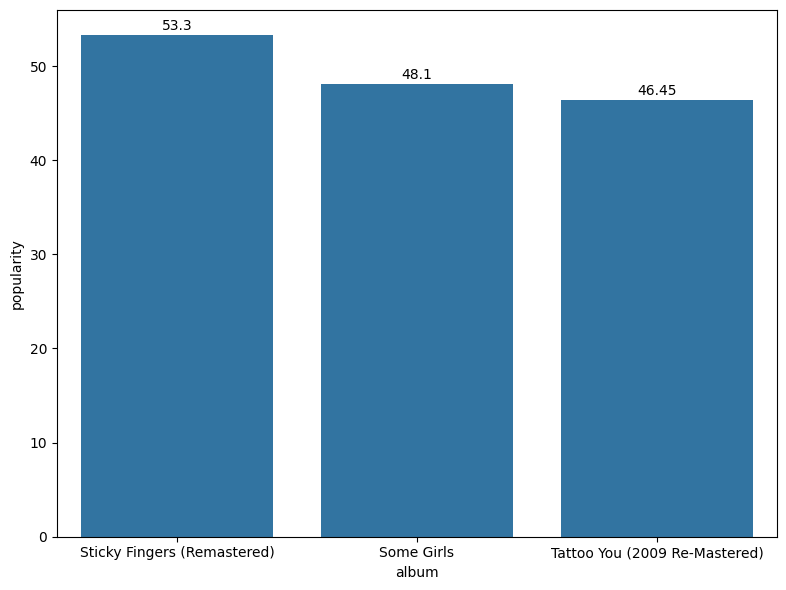

In [342]:
# Adding the popularity of songs in each album and using barplot to plot the top 2 albums that should be recommended.
# 1. Sticky Fingers(Remastered) and Some Girls Album are the top two popular albums that should be recommended.
plt.figure(figsize = (8,6))
sns.barplot(album_popularity, x = 'album', y = 'popularity')
plt.xlabel('album')
plt.ylabel('popularity')
for index, value in enumerate(album_popularity['popularity']):
  plt.text(x=index, y=(value) + 0.5, s=str(value), ha='center')
plt.tight_layout()
plt.show()

### 3 b. Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

<Figure size 800x800 with 0 Axes>

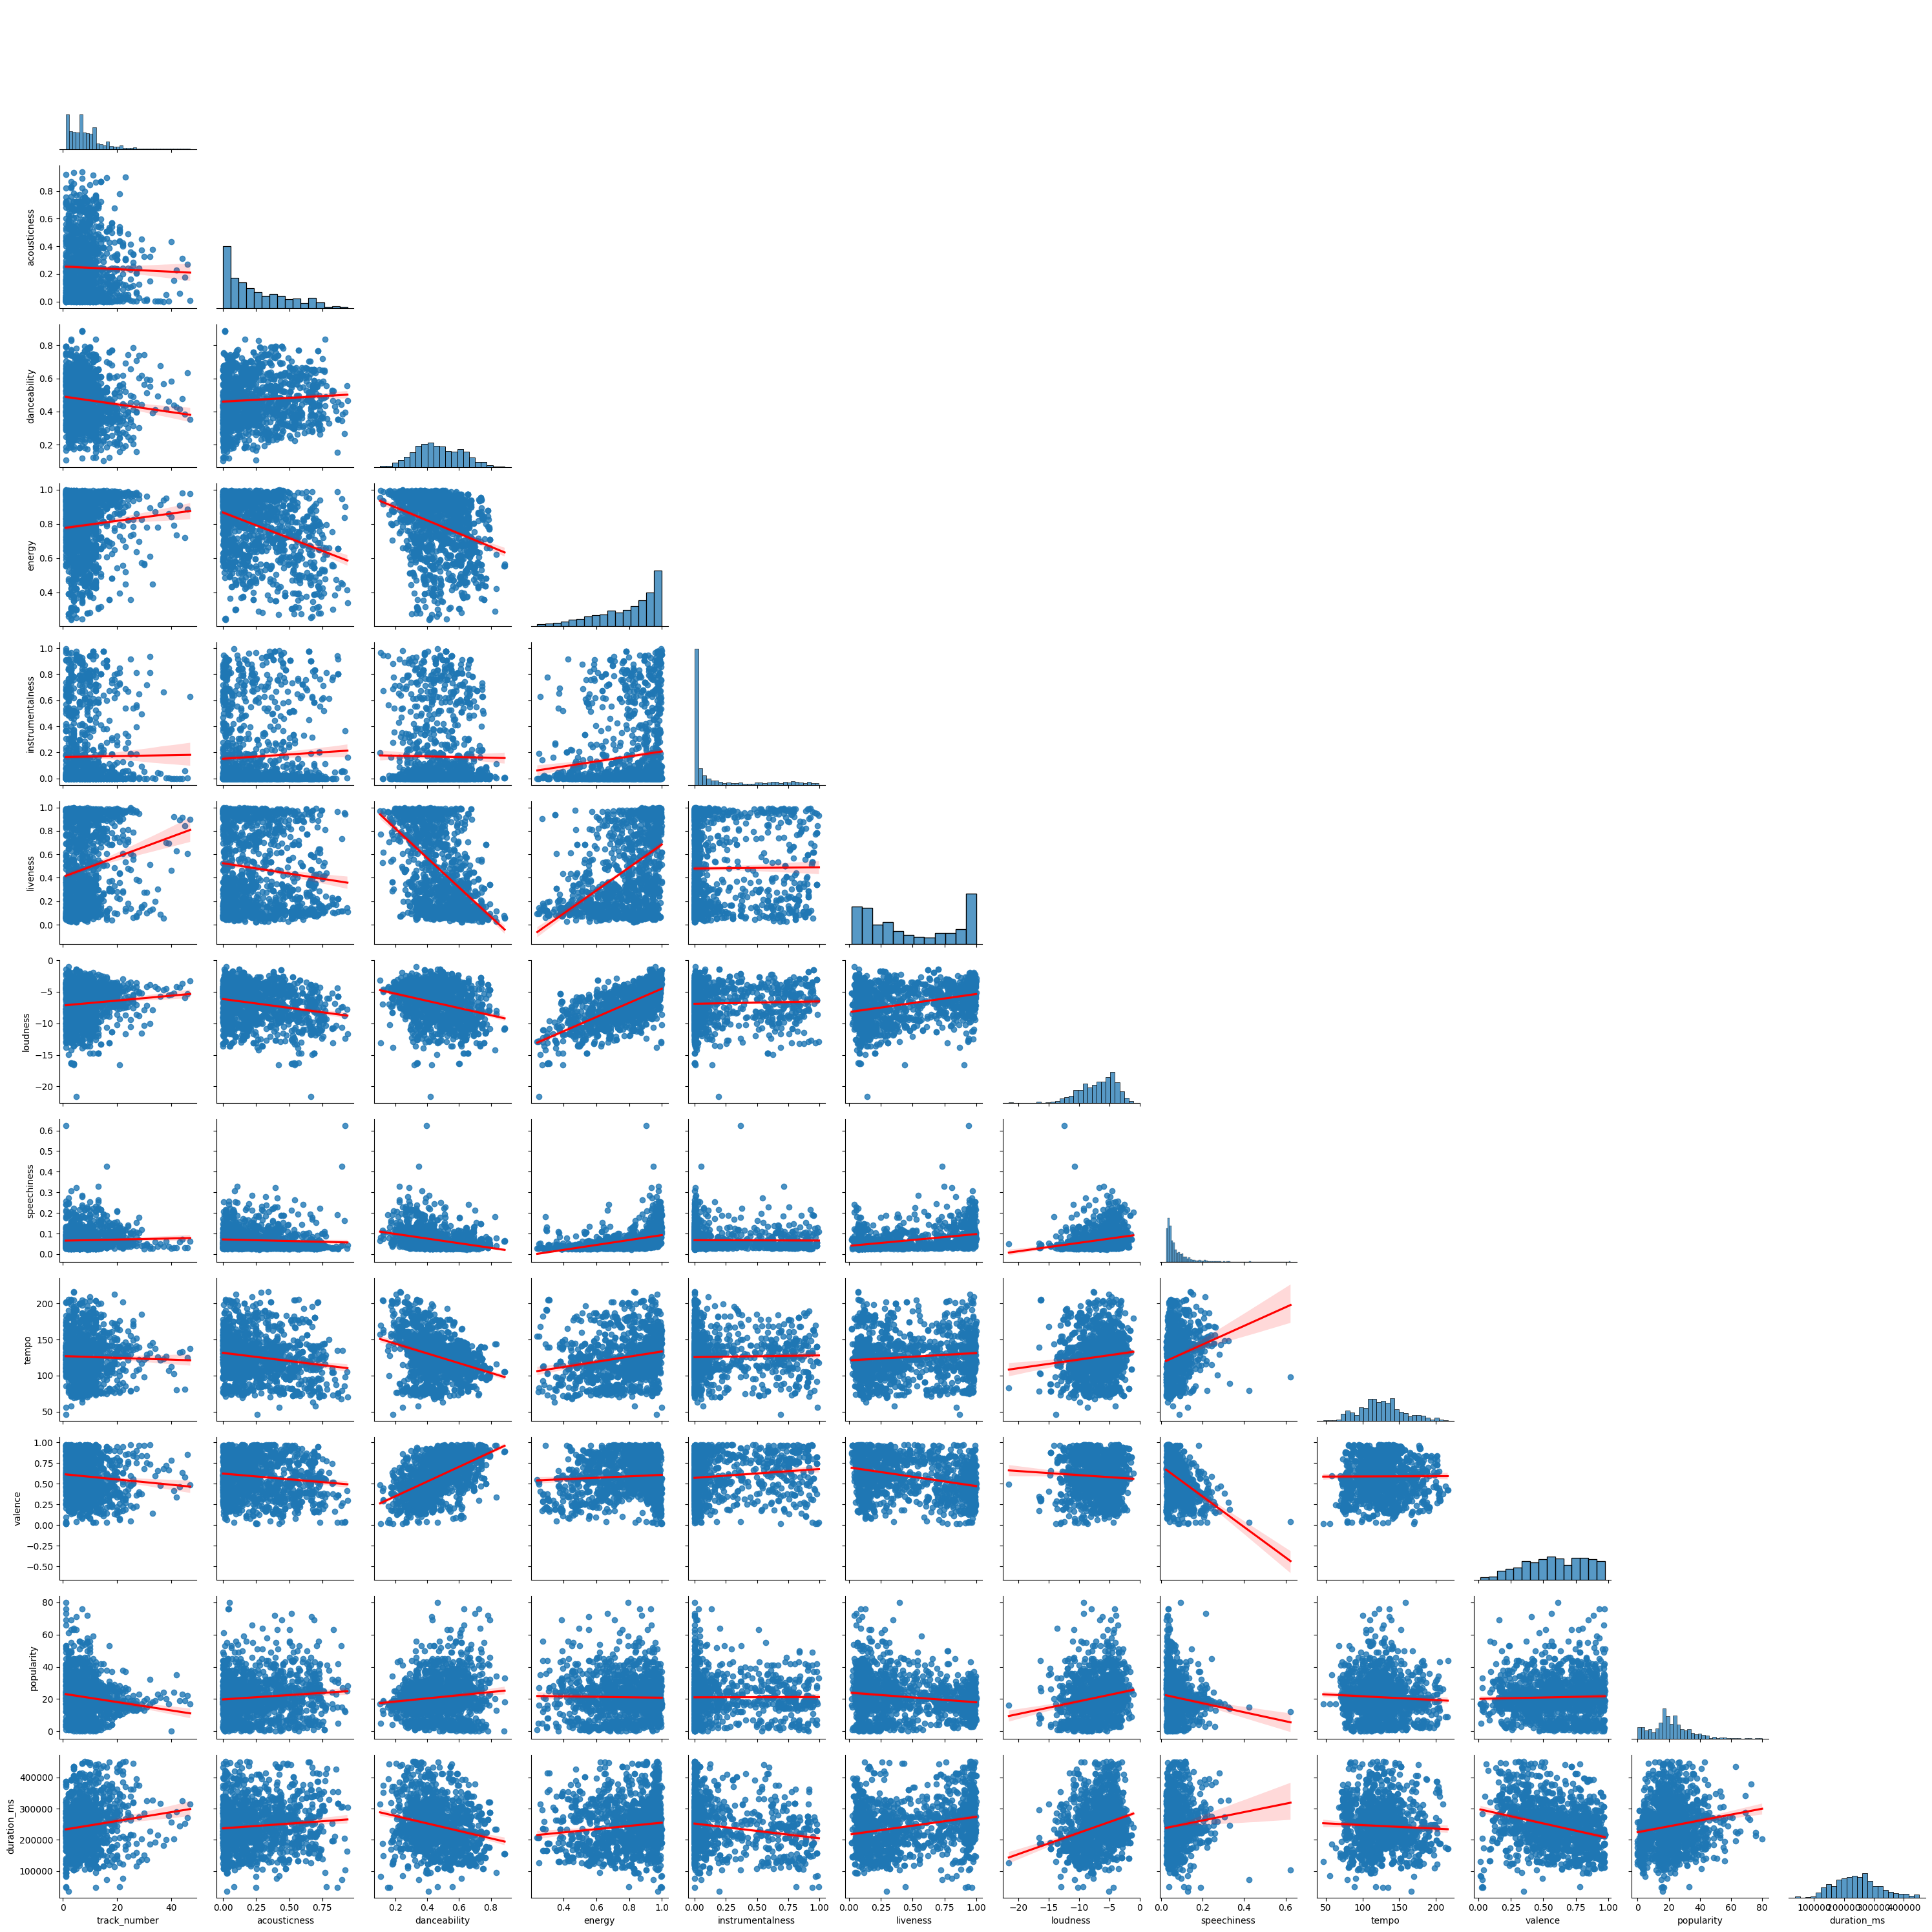

In [323]:
# Plotting pairplot below to find the correlation between all the features of the songs.
# The pairplot is plotted with regression line to understand the positive/negative correlation between the features.
plt.figure(figsize=(8,8))
sns.pairplot(data=df, kind='reg', corner=True, plot_kws={'line_kws': {'color': 'red'}})
plt.tight_layout()
plt.show()


### 3 c. Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

In [324]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms'],
      dtype='object')

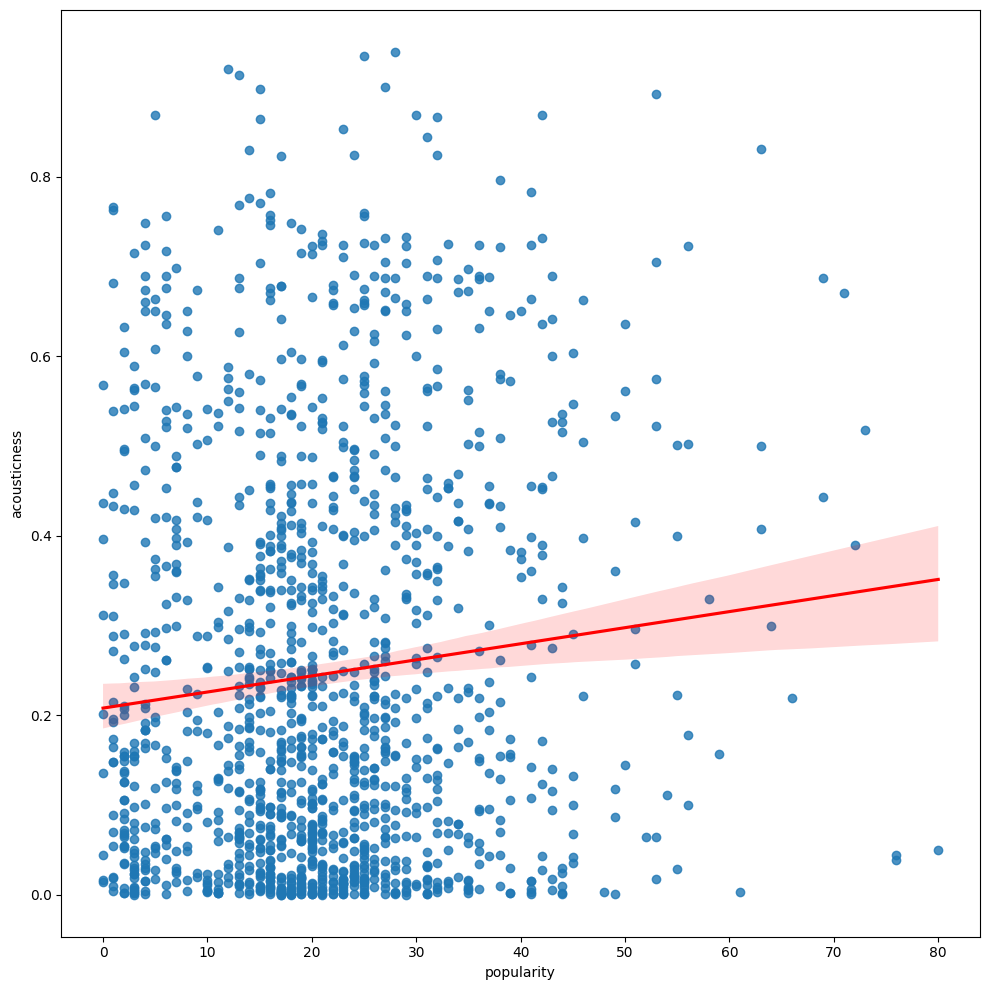

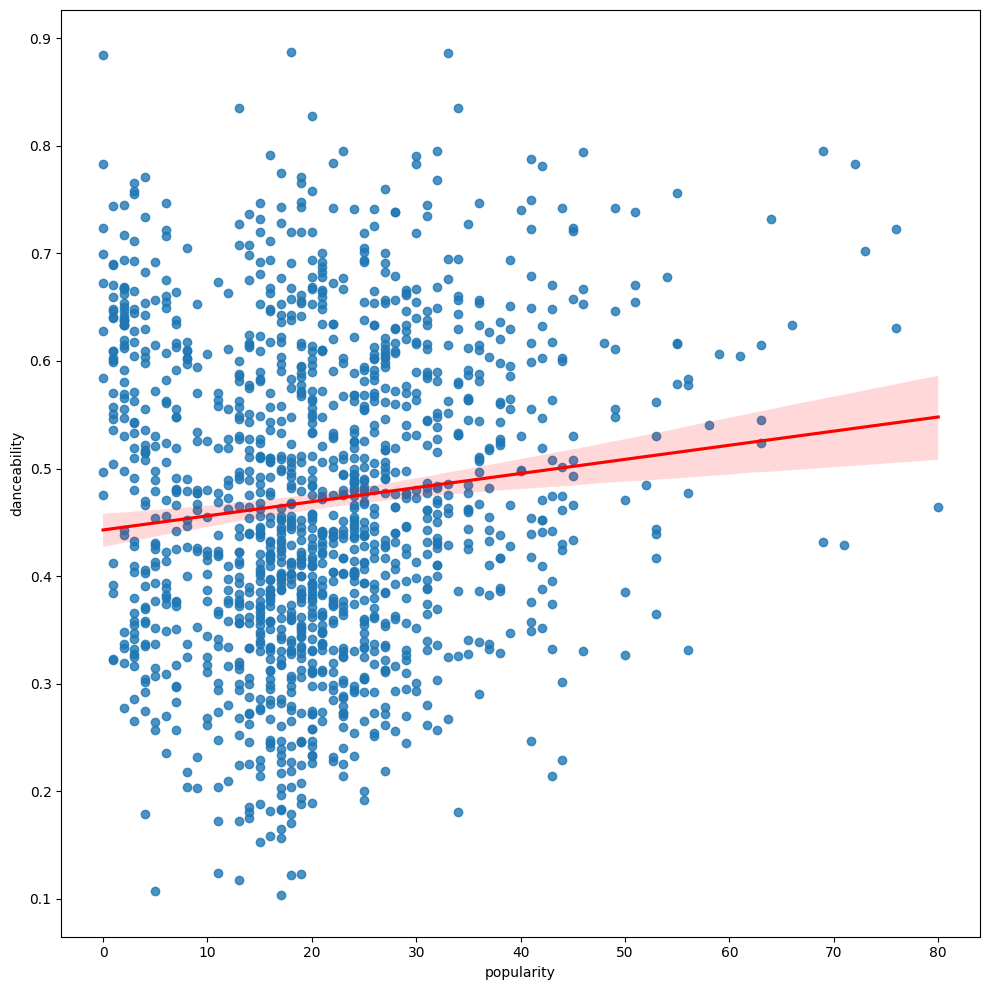

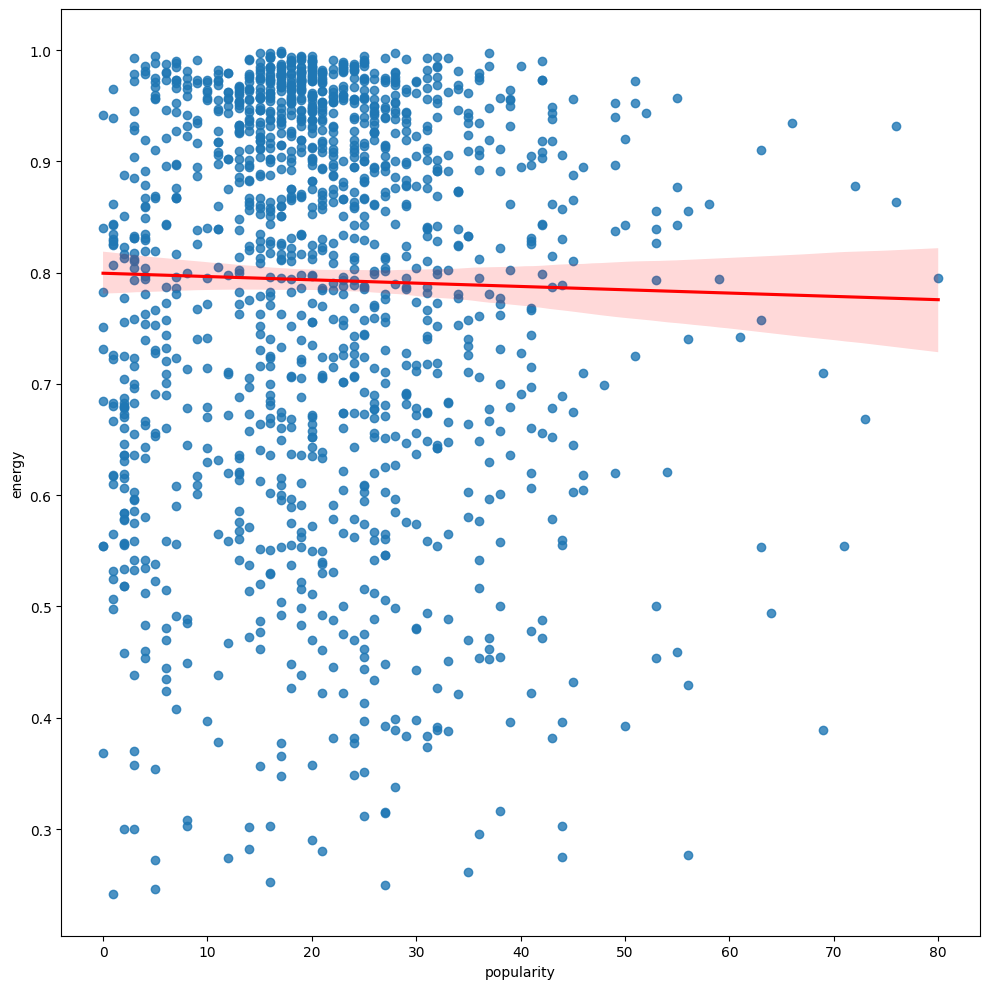

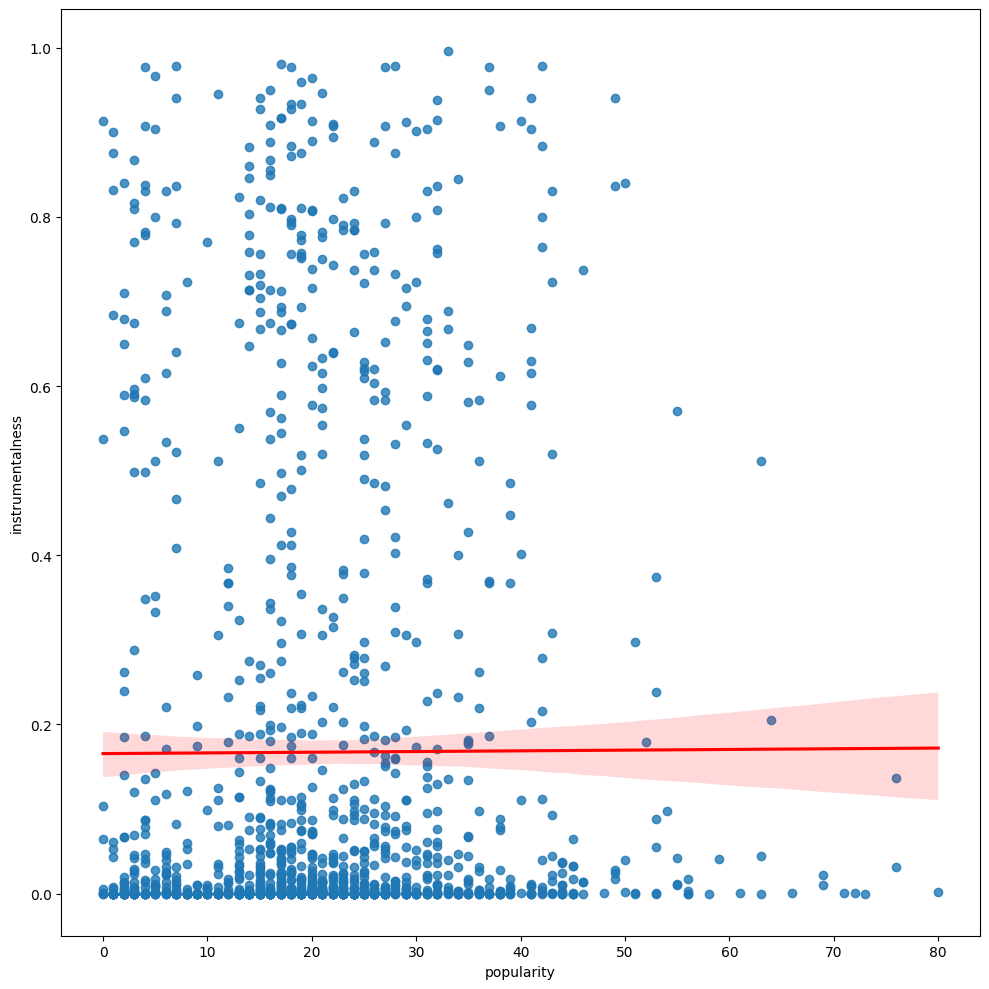

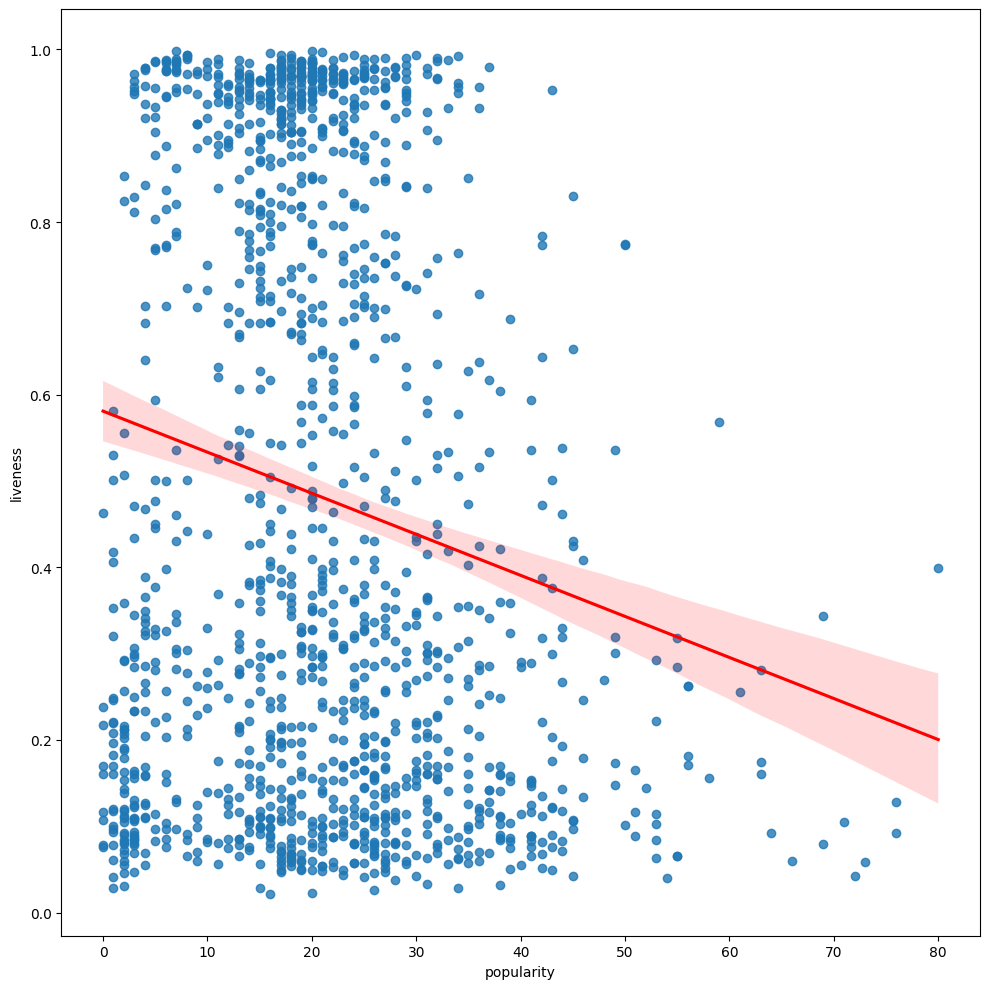

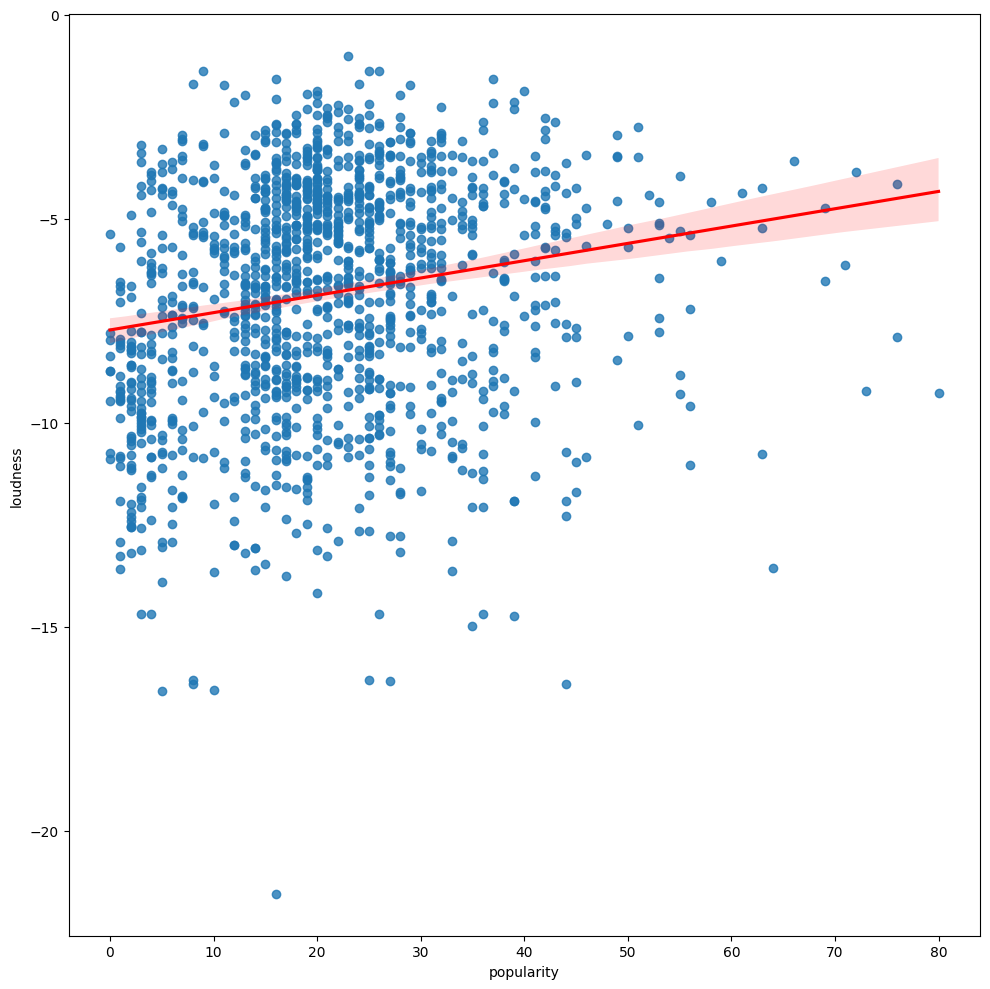

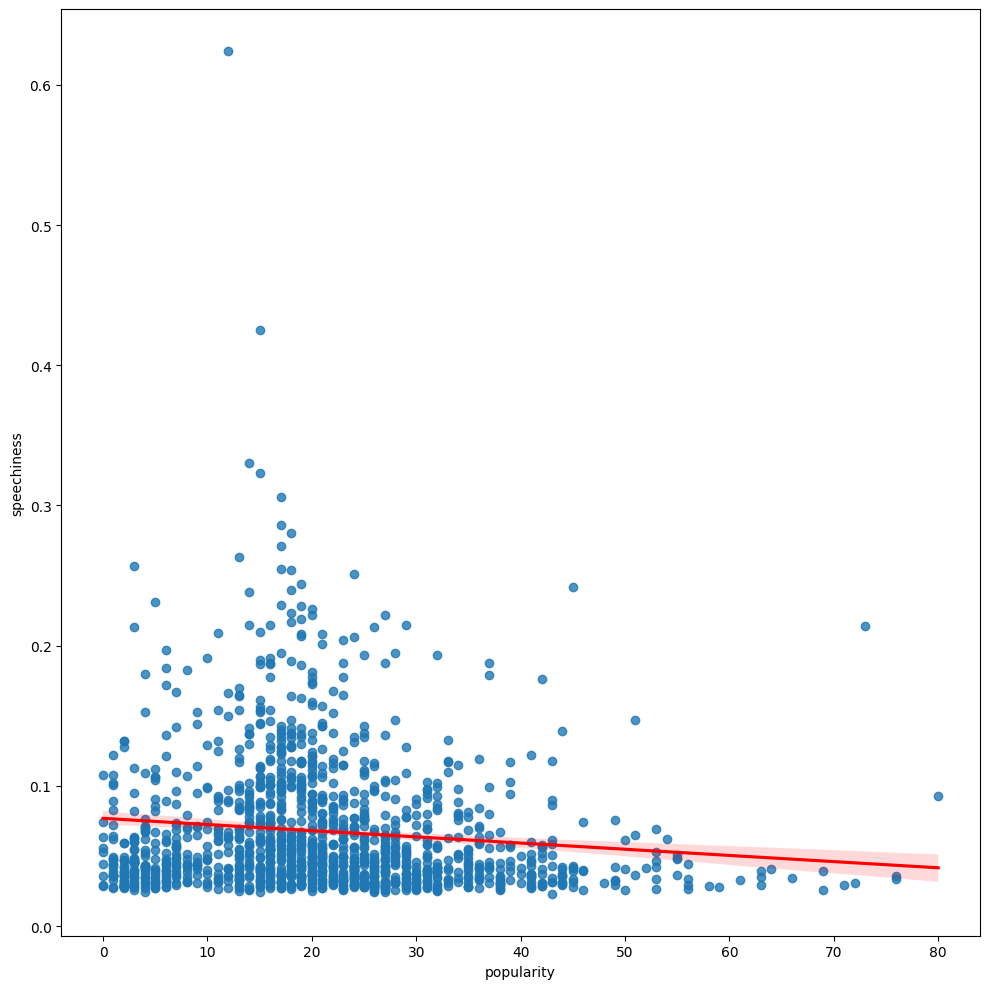

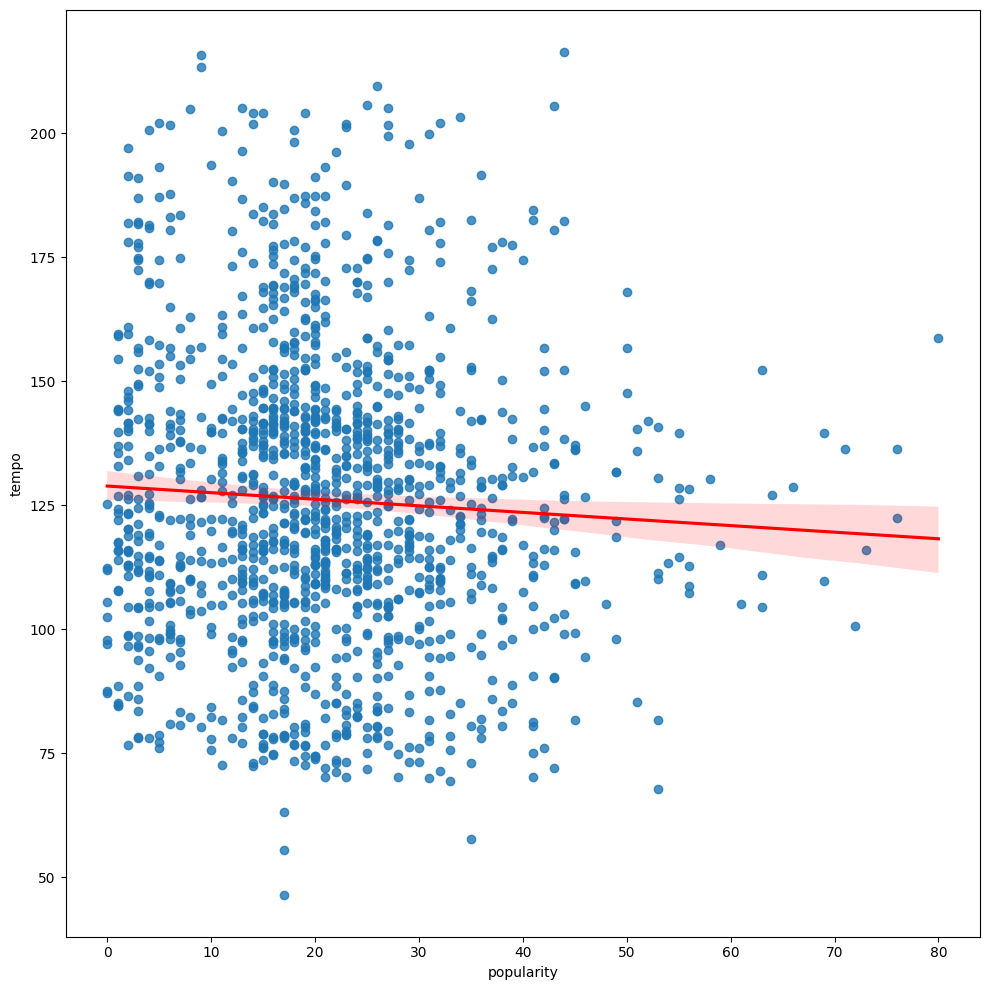

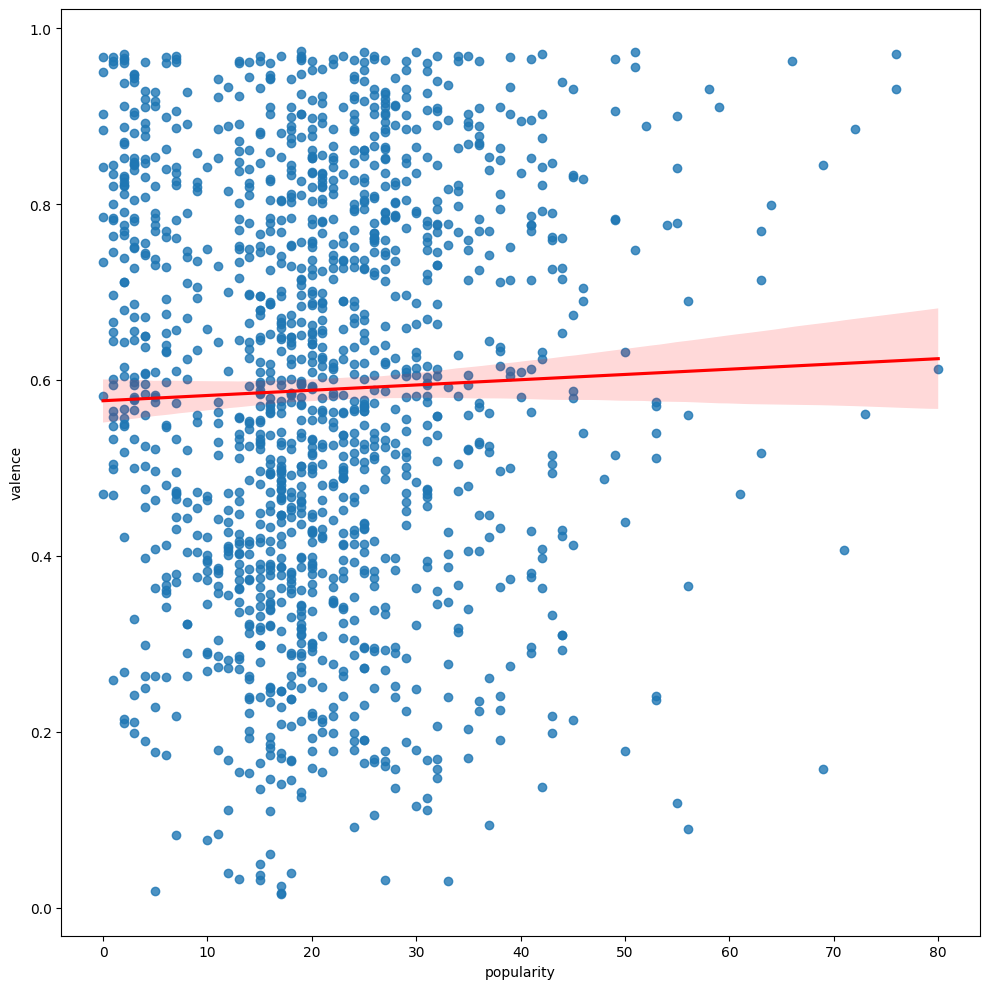

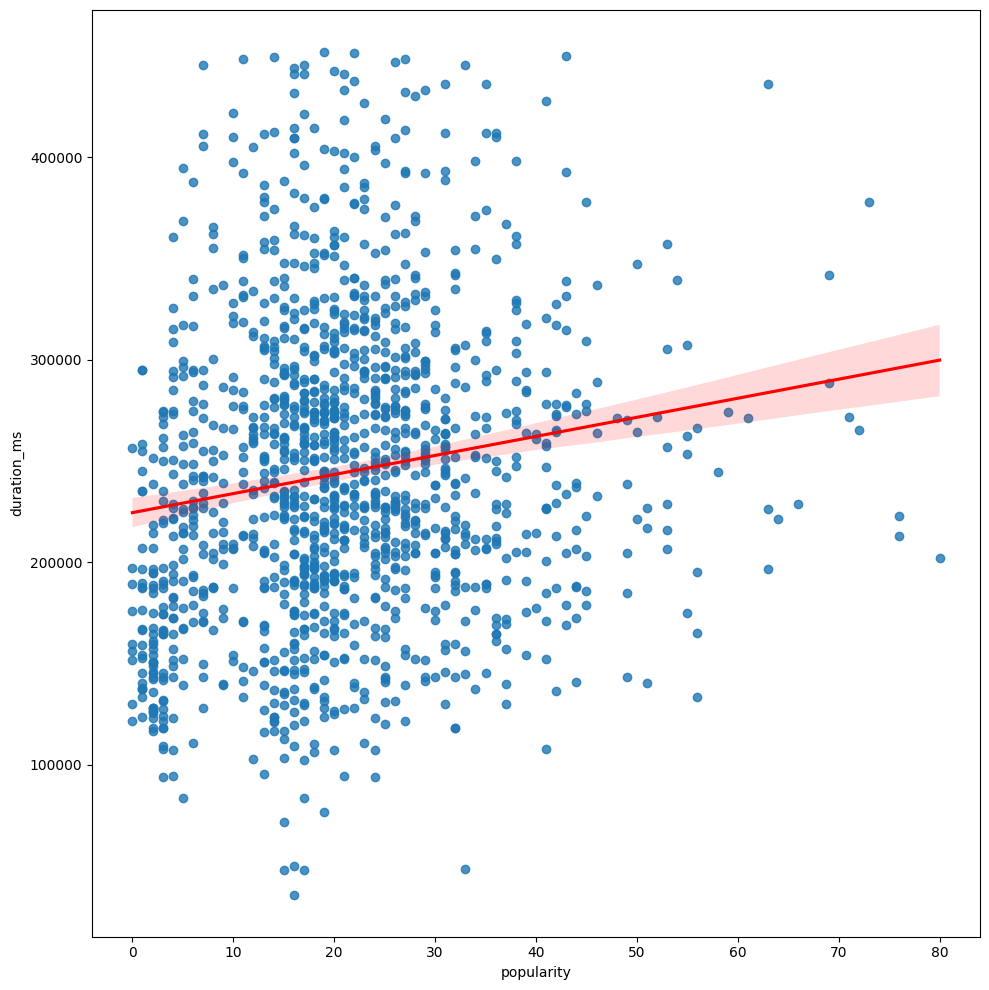

In [325]:
# Below are the scatterplot of popularity and various factors that helps to understand the correlations.
cols = ['acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'duration_ms']

for col in cols:
  plt.figure(figsize=(10,10))
  sns.regplot(data=df, x='popularity', y=col, line_kws={'color':'red'})
  plt.tight_layout()
  plt.show()

### 3 d. Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

In [326]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# df.columns
cols = ['acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence']

X = df[cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print('Explained variance ratio', pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio [0.3313007 0.1770418]
[0.3313007 0.5083425]


In [327]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose so rows = features
    columns=['PC1', 'PC2'],  # name columns
    index=cols  # original features
)

loadings

PC1       PC2
acousticness     -0.184208 -0.428927
danceability     -0.412419  0.313822
energy            0.449969  0.392928
instrumentalness  0.019516  0.192982
liveness          0.435410 -0.119196
loudness          0.383724  0.306971
speechiness       0.382231 -0.166778
tempo             0.224217  0.085089
valence          -0.244797  0.618393

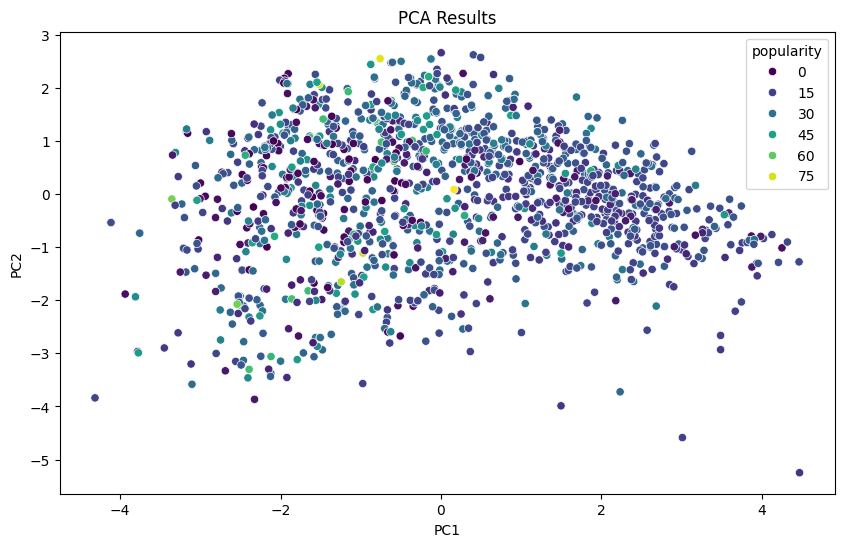

In [328]:
# Adding principal components to the dataframe
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Plotting the PCA results
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df, hue='popularity', palette='viridis')
plt.title('PCA Results')
plt.show()

### PCA with 2 components does not give good results and captures only close to 50% variance. So, we will need more features to capture more variance and this tells us that data is complex. So, PCA is not significant in this case.

# Perform cluster analysis
### a.Identify the right number of clusters


In [329]:
# Identify the right number of clusters
df = df.drop(['PC1','PC2'], axis=1)

In [330]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms'],
      dtype='object')

In [331]:
# Performing hopkins statistics test to check if data has clustering tendency or not.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X): # X must be a DataFrame
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [344]:
hopkins(X)
# Value of .87 shows that data has strong clustering tendency.

np.float64(0.8833173377696669)

WCSS for 2 clusters: 9788.88502275238
WCSS for 3 clusters: 8433.854189847525
WCSS for 4 clusters: 7722.505406152469
WCSS for 5 clusters: 7275.861281296138
WCSS for 6 clusters: 6724.3680442710465
WCSS for 7 clusters: 6329.344254314343
WCSS for 8 clusters: 5920.8372553633435
WCSS for 9 clusters: 5696.180034496334
WCSS for 10 clusters: 5500.326793736317


Text(0.5, 1.0, 'Elbow Method')

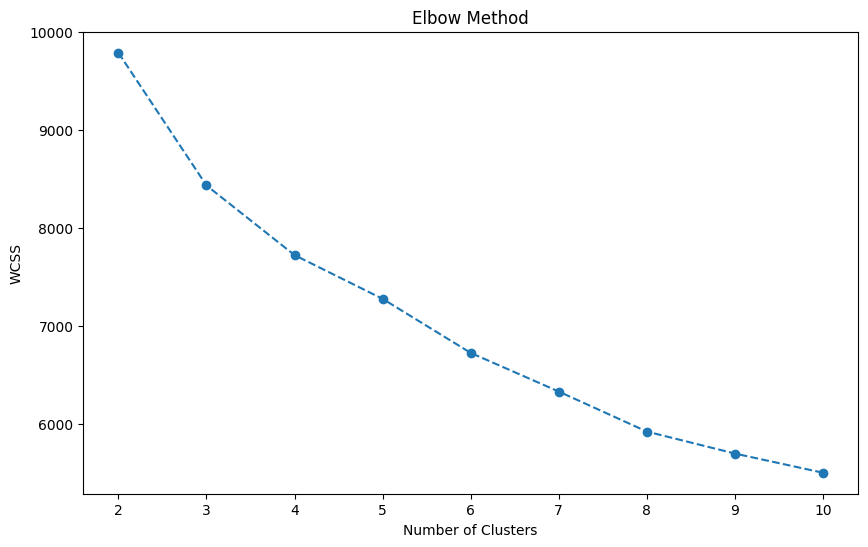

In [345]:
# Elbow Method
# Elbow method is suggesting 3 or 4 clusters as drop in inertia is lesser after cluster size of 3.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cols = df.select_dtypes(include=['number']).columns
cols = cols.drop('popularity') # keeping only song features in the cols
cols = cols.drop('duration_ms')
cols = cols.drop('track_number')

sc = StandardScaler()
df[cols] = sc.fit_transform(df[cols])

X = df[cols]

wcss = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=1)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print(f"WCSS for {i} clusters: {kmeans.inertia_}")

plt.figure(figsize=(10,6))
plt.plot(range(2,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

Silhouette score for 2 clusters: 0.21521774917386685
Silhouette score for 3 clusters: 0.18969899852327257
Silhouette score for 4 clusters: 0.18757531344394068
Silhouette score for 5 clusters: 0.16484176352219193
Silhouette score for 6 clusters: 0.1644864254636896
Silhouette score for 7 clusters: 0.160119879260854
Silhouette score for 8 clusters: 0.1678074552253961
Silhouette score for 9 clusters: 0.15013642661733154
Silhouette score for 10 clusters: 0.1523920677083382


Text(0.5, 1.0, 'Silhouette Score')

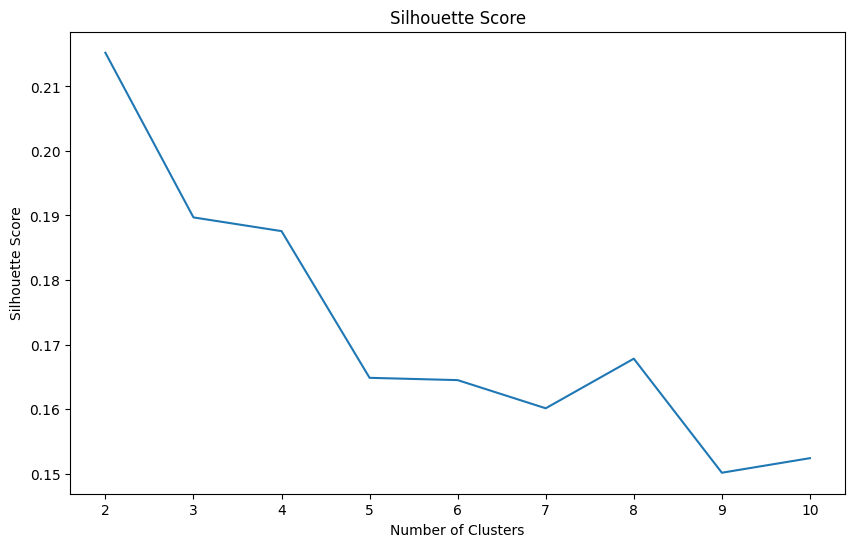

In [334]:
# Calculating silhoutte score
from sklearn.metrics import silhouette_score

sil_score = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=1)
  labels = kmeans.fit_predict(X)
  sil_score.append(silhouette_score(X, labels))
  print(f"Silhouette score for {i} clusters: {silhouette_score(X, labels)}")
  # print(kmeans.labels_)

plt.figure(figsize=(10,6))
plt.plot(range(2,11), sil_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

### 3 b.Use appropriate clustering algorithms

### Here we are considering cluster size suggested by elbow method as we want fine grained groups and some overlap can be tolerated.

In [335]:
# # Implementing KMeans clustering
from sklearn.cluster import KMeans
import seaborn as sns
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X) # X is a numpy array

custom_palette = {
    '0': '#e41a1c',  # red
    '1': '#377eb8',  # blue
    '2': '#4daf4a',  # green
    '3': '#984ea3'   # purple
}
print(cols)
#print(kmeans.cluster_centers_)

#print("\nLabels assigned to each data point:\n")
#print(kmeans.labels_)
X['Cluster'] = kmeans.labels_.astype(str)
X.head()

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence'],
      dtype='object')


acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0     -0.722799     -0.052652  1.110931          2.970374  1.299041 -2.121928   
1      0.847270     -1.009515  0.955268          0.235739  1.382511  0.709351   
2      0.754288     -0.590451  0.977506          0.834276  1.368120  0.662920   
3      1.422873     -0.709186  1.066456         -0.598963  1.192544  0.453803   
4      0.683444     -1.170157  0.977506         -0.398998  1.396902  0.606364   

   speechiness     tempo   valence Cluster  
0     0.863441 -0.273249 -2.395500       1  
1     0.169172  0.182926 -1.161736       2  
2     0.965239  0.135830 -1.183171       2  
3     2.553303  0.235107 -1.894793       2  
4     0.517324  0.151664 -1.641867       2

### 3 c. Define each cluster based on the features

In [336]:
# Plotting the clusters for few features
def plot_cluster(x_axis, y_axis):
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=x_axis, y=y_axis, hue="Cluster", hue_order = sorted(X['Cluster'].unique()), data=X, palette=custom_palette, s=100)
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
  plt.title(f'KMeans Clustering {x_axis} vs {y_axis}')
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.legend(loc='best')
  plt.grid(alpha=0.15)
  plt.show()

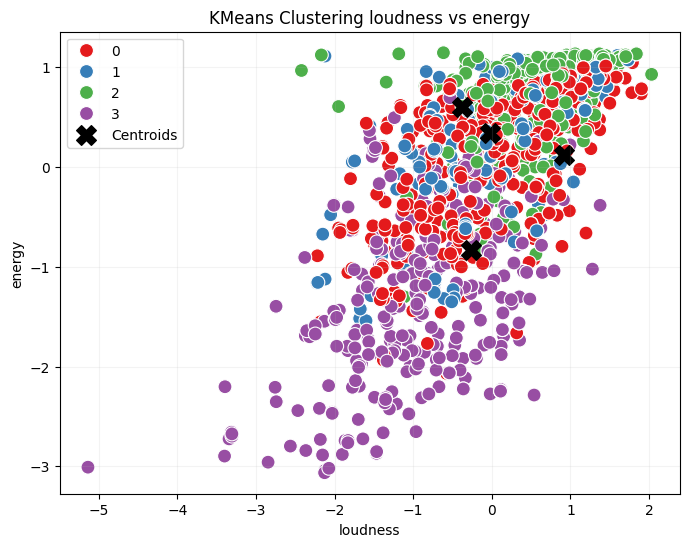

In [337]:
# loudness vs energy
plot_cluster('loudness','energy')

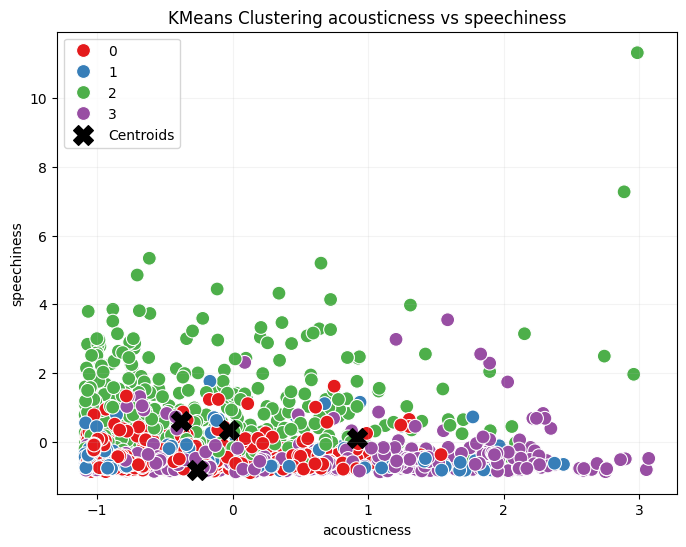

In [338]:
# acousticness vs speechiness
plot_cluster('acousticness','speechiness')

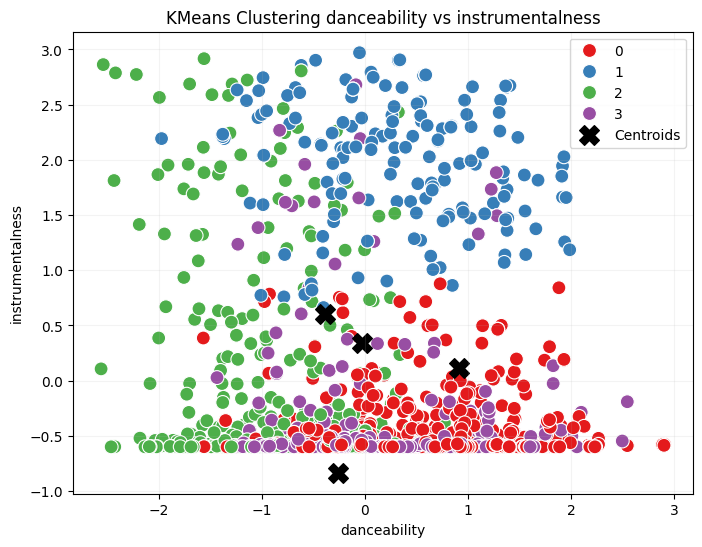

In [339]:
# danceability vs instrumentalness
plot_cluster('danceability','instrumentalness')

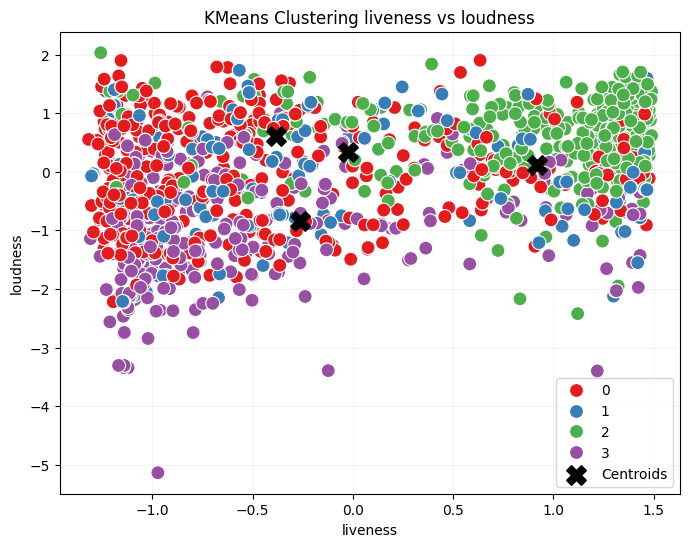

In [340]:
plot_cluster('liveness','loudness')

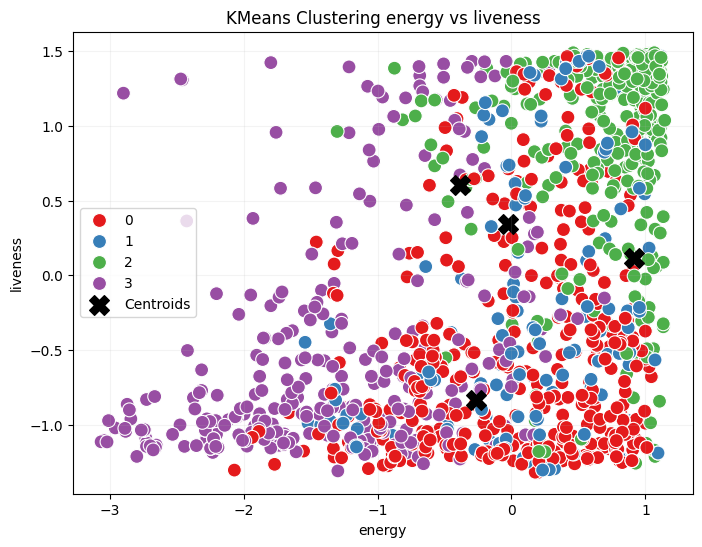

In [341]:
# Energy and Liveness
plot_cluster('energy','liveness')